In [2]:
# Optimized code with comments
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# data = pd.read_csv('Combined_Flights_2022.csv')

In [4]:
# Mapped columns based on your dataset
use_cols = [
    'Year',                     # Year
    'Month',                    # Month
    'DayofMonth',               # DayofMonth
    'DayOfWeek',                # DayOfWeek
    'DepTime',                  # DepTime
    'CRSDepTime',               # CRSDepTime
    'ArrTime',                  # ArrTime
    'CRSArrTime',               # CRSArrTime
    'Marketing_Airline_Network', # Marketing_Airline_Network
    'Flight_Number_Marketing_Airline', # Flight_Number_Marketing_Airline
    'Tail_Number',              # Tail_Number
    'ActualElapsedTime',        # ActualElapsedTime
    'CRSElapsedTime',           # CRSElapsedTime
    'AirTime',                  # AirTime
    'ArrDelay',                 # ArrDelay
    'DepDelay',                 # DepDelay
    'Origin',                   # Origin
    'Dest',                     # Dest
    'Distance',                 # Distance
    'TaxiIn',                   # TaxiIn
    'TaxiOut',                  # TaxiOut
    'Cancelled',                # Cancelled
    'Diverted',                 # Diverted
    'Airline',                  # Airline
    'DepDelayMinutes',         # DepDelayMinutes
    # Note: CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay
    # are not present in your dataset, so these cannot be directly mapped and will need additional handling if required.
]

# Read the CSV file and select relevant columns, then sample 300,000 rows
df = pd.read_csv('dataset/Combined_Flights_2022.csv', usecols=use_cols).sample(300000, random_state=44)

# Display the first few rows of the DataFrame
df.head()


,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,...,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Flight_Number_Marketing_Airline,Tail_Number,TaxiOut,TaxiIn,CRSArrTime,ArrDelay
3901683,United Air Lines Inc.,IAD,BUF,False,False,2227,2303.0,36.0,36.0,28.0,...,3,6,7,UA,686,N35204,19.0,19.0,2341,47.0
1330605,Frontier Airlines Inc.,STL,ATL,False,False,2008,1956.0,0.0,-12.0,2235.0,...,7,11,1,F9,1586,N344FR,17.0,12.0,2246,-11.0
3695971,American Airlines Inc.,ORD,TPA,False,False,805,801.0,0.0,-4.0,1131.0,...,3,16,3,AA,2920,N992AN,8.0,4.0,1141,-10.0
1125669,SkyWest Airlines Inc.,LAX,COS,False,False,1839,1830.0,0.0,-9.0,2158.0,...,7,30,6,UA,5282,N457SW,16.0,9.0,2204,-6.0
2772738,Republic Airlines,PHL,EWR,False,False,601,845.0,164.0,164.0,1002.0,...,6,3,5,UA,3656,N724YX,33.0,21.0,700,182.0


In [4]:
# Print the shape of the DataFrame
print(df.shape)

# Display information about the DataFrame
df.info()

(300000, 25)
<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 3901683 to 1637906
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Airline                          300000 non-null  object 
 1   Origin                           300000 non-null  object 
 2   Dest                             300000 non-null  object 
 3   Cancelled                        300000 non-null  bool   
 4   Diverted                         300000 non-null  bool   
 5   CRSDepTime                       300000 non-null  int64  
 6   DepTime                          291111 non-null  float64
 7   DepDelayMinutes                  291104 non-null  float64
 8   DepDelay                         291104 non-null  float64
 9   ArrTime                          290809 non-null  float64
 10  AirTime                          290145 non-null  float64
 11  CRSElapsedTime                   300000 non-null  

In [5]:
df.describe()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Month,DayofMonth,DayOfWeek,Flight_Number_Marketing_Airline,TaxiOut,TaxiIn,CRSArrTime,ArrDelay
count,300000.000000,291111.000000,291104.000000,291104.000000,290809.000000,290145.000000,300000.000000,290145.000000,300000.000000,300000.0,300000.000000,300000.000000,300000.000000,300000.000000,290931.000000,290809.000000,300000.000000,290145.000000
mean,1328.688003,1333.709029,16.019052,13.098123,1458.879099,110.750559,141.060980,135.596812,795.883487,2022.0,4.082343,15.711203,4.005807,2562.296033,16.984453,7.876372,1485.800473,7.528425
std,490.015590,505.024378,52.139599,53.147000,541.309941,69.774736,71.602893,71.636499,590.118435,0.0,1.996461,8.761197,2.007512,1745.876347,9.500131,6.622054,517.224264,55.056690
min,1.000000,1.000000,0.000000,-55.000000,1.000000,8.000000,22.000000,16.000000,31.000000,2022.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-76.000000
25%,912.000000,916.000000,0.000000,-5.000000,1047.000000,60.000000,89.000000,83.000000,366.000000,2022.0,2.000000,8.000000,2.000000,1105.000000,11.000000,4.000000,1102.000000,-14.000000
50%,1320.000000,1325.000000,0.000000,-2.000000,1500.000000,93.000000,124.000000,119.000000,641.000000,2022.0,4.000000,16.000000,4.000000,2227.000000,15.000000,6.000000,1512.000000,-5.000000
75%,1734.000000,1743.000000,11.000000,11.000000,1913.000000,140.000000,171.000000,166.000000,1032.000000,2022.0,6.000000,23.000000,6.000000,3879.000000,19.000000,9.000000,1919.000000,10.000000
max,2359.000000,2400.000000,2994.000000,2994.000000,2400.000000,673.000000,690.000000,701.000000,5095.000000,2022.0,7.000000,31.000000,7.000000,9679.000000,171.000000,281.000000,2359.000000,2977.000000


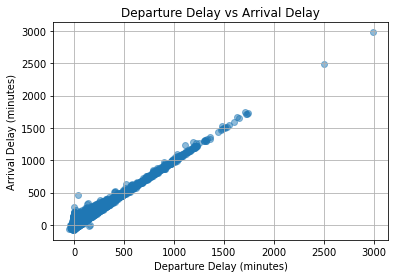

,DepDelay,ArrDelay
DepDelay,1.000000,0.968194
ArrDelay,0.968194,1.000000


In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['DepDelay'], df['ArrDelay'], alpha=0.5)
plt.title('Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()
df[['DepDelay','ArrDelay']].corr()

### Cancellation Code Distribution:

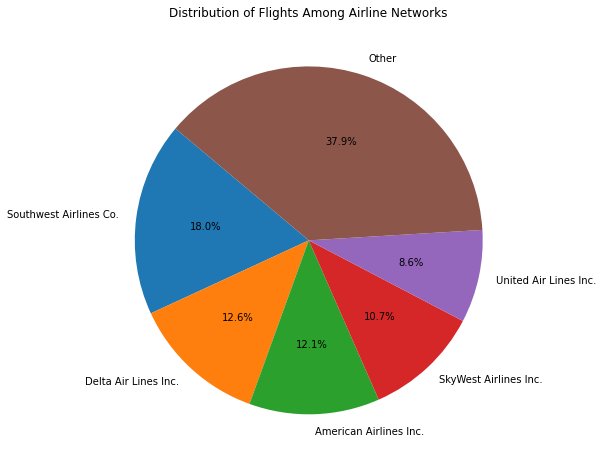

Airline
Southwest Airlines Co.                       54008
Delta Air Lines Inc.                         37741
American Airlines Inc.                       36353
SkyWest Airlines Inc.                        32208
United Air Lines Inc.                        25890
Republic Airlines                            14677
JetBlue Airways                              11604
Envoy Air                                    11197
Endeavor Air Inc.                            10485
Comair Inc.                                  10056
Alaska Airlines Inc.                          9512
Spirit Air Lines                              9313
Frontier Airlines Inc.                        6393
Allegiant Air                                 5303
Mesa Airlines Inc.                            5281
Horizon Air                                   4316
Capital Cargo International                   3827
Commutair Aka Champlain Enterprises, Inc.     3238
Hawaiian Airlines Inc.                        3106
Air Wisconsin Airlines 

In [7]:
airline_network_counts = df['Airline'].value_counts()

# Filtering out airline networks with less than 5% of total flights
threshold = 0.05 * df.shape[0]
airline_network_counts_filtered = airline_network_counts[airline_network_counts >= threshold]
other_flights_count = airline_network_counts[airline_network_counts < threshold].sum()
airline_network_counts_filtered['Other'] = other_flights_count

# Plotting a pie chart to visualize the distribution of flights among airline networks
plt.figure(figsize=(8, 8))
plt.pie(airline_network_counts_filtered, labels=airline_network_counts_filtered.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Flights Among Airline Networks')
plt.show()
df['Airline'].value_counts()

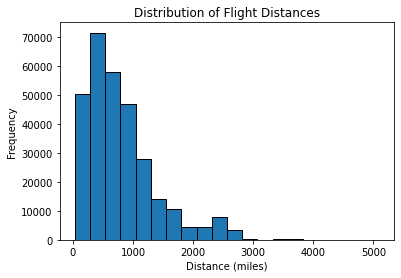

count    300000.000000
mean        795.883487
std         590.118435
min          31.000000
25%         366.000000
50%         641.000000
75%        1032.000000
max        5095.000000
Name: Distance, dtype: float64

In [8]:
plt.hist(df['Distance'], bins=20, edgecolor='black')
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()
df['Distance'].describe()

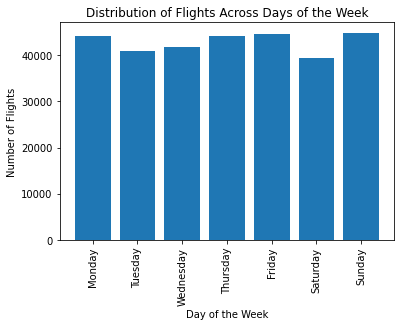

DayOfWeek
1    44211
2    40858
3    41863
4    44211
5    44608
6    39401
7    44848
Name: count, dtype: int64

In [9]:
# Count the occurrences of flights for each day of the week
day_of_week_counts = df['DayOfWeek'].value_counts().sort_index()

# Plotting a bar chart to visualize the distribution of flights across days of the week
plt.bar(day_of_week_counts.index, day_of_week_counts.values)
plt.title('Distribution of Flights Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.xticks(range(1, 8), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.show()
df['DayOfWeek'].value_counts().sort_index()

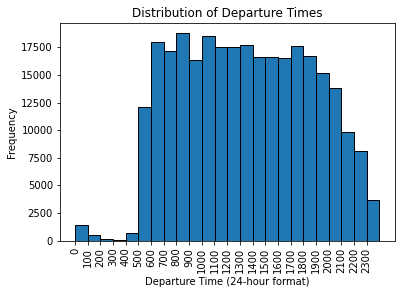

count    291111.000000
mean       1333.709029
std         505.024378
min           1.000000
25%         916.000000
50%        1325.000000
75%        1743.000000
max        2400.000000
Name: DepTime, dtype: float64

In [10]:
# Plotting a histogram to visualize the distribution of departure times
plt.hist(df['DepTime'], bins=24, edgecolor='black')
plt.title('Distribution of Departure Times')
plt.xlabel('Departure Time (24-hour format)')
plt.ylabel('Frequency')
plt.xticks(range(0, 2400, 100), rotation=90)  # Setting x-axis ticks for every 100 hours
plt.show()
df['DepTime'].describe()

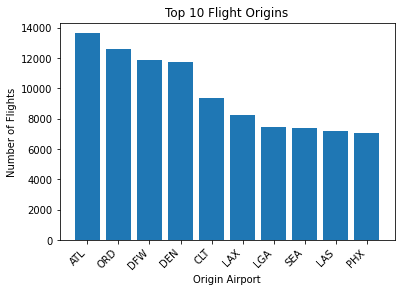

Origin
ATL    13645
ORD    12599
DFW    11861
DEN    11772
CLT     9349
       ...  
STC        4
OWB        3
BKG        3
PPG        3
OGD        2
Name: count, Length: 373, dtype: int64

In [11]:
# Count the occurrences of flights for each origin airport
origin_counts = df['Origin'].value_counts()

# Plotting a bar chart to visualize the distribution of flight origins
plt.bar(origin_counts.index[:10], origin_counts.values[:10])
plt.title('Top 10 Flight Origins')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.show()
df['Origin'].value_counts()

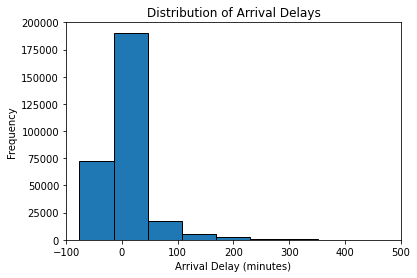

In [12]:
import matplotlib.pyplot as plt

# Plotting a histogram to visualize the distribution of arrival delays
plt.hist(df['ArrDelay'], bins=50, edgecolor='black')
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(-100, 500)
plt.show()

In [13]:
# Fill missing values in 'TAXI_OUT' column with 0
df['TaxiOut'].fillna(0, inplace=True)

# Filter the DataFrame for canceled flights
cancelled = df[df['Cancelled'] == 1]

# Display the last few rows of the filtered DataFrame
cancelled.tail()

,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,...,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Flight_Number_Marketing_Airline,Tail_Number,TaxiOut,TaxiIn,CRSArrTime,ArrDelay
2825508,American Airlines Inc.,SFO,CLT,True,False,2353,NaN,NaN,NaN,NaN,...,6,16,4,AA,1807,N510UW,0.0,NaN,804,NaN
1435517,American Airlines Inc.,ELP,DFW,True,False,620,NaN,NaN,NaN,NaN,...,7,30,6,AA,812,N563UW,0.0,NaN,907,NaN
3864734,Horizon Air,ANC,FAI,True,False,1445,NaN,NaN,NaN,NaN,...,3,26,6,AS,2198,N636QX,0.0,NaN,1550,NaN
3076132,Horizon Air,SEA,SUN,True,False,702,NaN,NaN,NaN,NaN,...,1,1,6,AS,2208,N430QX,0.0,NaN,948,NaN
1026605,Envoy Air,VPS,DFW,True,False,722,NaN,NaN,NaN,NaN,...,2,24,4,AA,3839,N225NN,0.0,NaN,946,NaN


DayOfWeek
1    0.028884
2    0.015591
3    0.022287
4    0.037638
5    0.036339
6    0.037030
7    0.033915
Name: Cancelled, dtype: float64

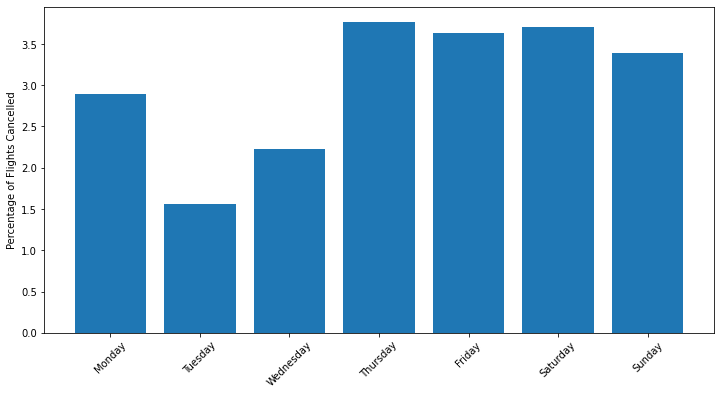

In [14]:
days_cancelled = cancelled['Cancelled'].groupby(df['DayOfWeek']).count()
days_total = df['Cancelled'].groupby(df['DayOfWeek']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)
np.divide(days_cancelled, days_total)

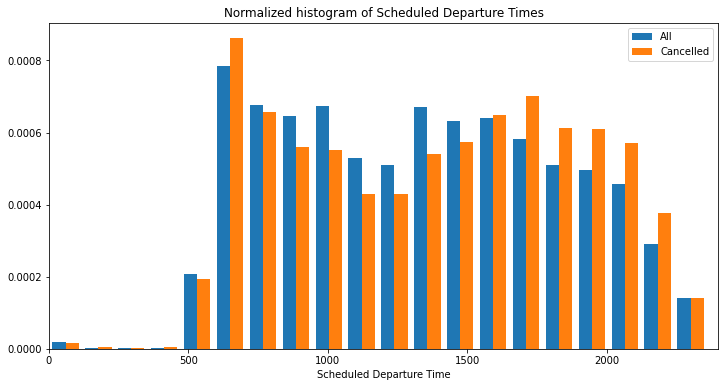

Scheduled Departure Time (All Flights):
60: 0.0000
178: 0.0000
296: 0.0000
414: 0.0000
532: 0.0002
649: 0.0008
767: 0.0007
885: 0.0006
1003: 0.0007
1121: 0.0005
1239: 0.0005
1357: 0.0007
1475: 0.0006
1593: 0.0006
1711: 0.0006
1828: 0.0005
1946: 0.0005
2064: 0.0005
2182: 0.0003
2300: 0.0001

Scheduled Departure Time (Cancelled Flights):
60: 0.0000
178: 0.0000
296: 0.0000
414: 0.0000
532: 0.0002
649: 0.0009
767: 0.0007
885: 0.0006
1003: 0.0006
1121: 0.0004
1239: 0.0004
1357: 0.0005
1475: 0.0006
1593: 0.0006
1711: 0.0007
1828: 0.0006
1946: 0.0006
2064: 0.0006
2182: 0.0004
2300: 0.0001


In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist([df['CRSDepTime'], cancelled['CRSDepTime']], density=True, bins=20, label=['All', 'Cancelled'])
ax.set_xlim(0, 2400)
ax.set_xlabel('Scheduled Departure Time')
ax.set_title('Normalized histogram of Scheduled Departure Times')
plt.legend()
plt.show()

all_hist, all_bins = np.histogram(df['CRSDepTime'], bins=20, density=True)
all_midpoints = (all_bins[1:] + all_bins[:-1]) / 2

cancelled_hist, _ = np.histogram(cancelled['CRSDepTime'], bins=all_bins, density=True)

print("Scheduled Departure Time (All Flights):")
for midpoint, count in zip(all_midpoints, all_hist):
    print(f"{midpoint:.0f}: {count:.4f}")

print("\nScheduled Departure Time (Cancelled Flights):")
for midpoint, count in zip(all_midpoints, cancelled_hist):
    print(f"{midpoint:.0f}: {count:.4f}")

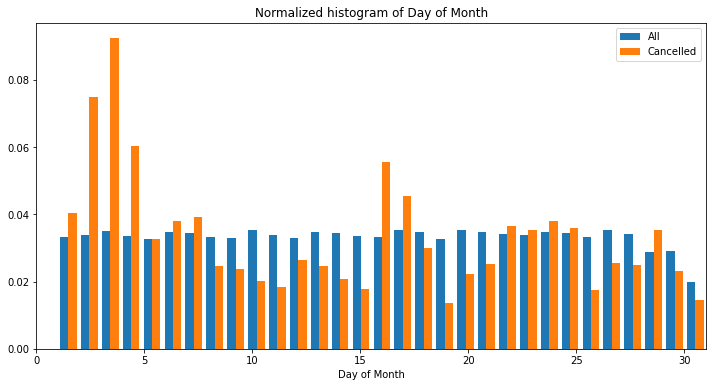

Day of Month (All Flights):
1: 0.0333
2: 0.0338
3: 0.0350
4: 0.0337
5: 0.0327
6: 0.0348
7: 0.0343
8: 0.0333
9: 0.0329
10: 0.0353
11: 0.0339
12: 0.0330
13: 0.0348
14: 0.0344
15: 0.0337
16: 0.0333
17: 0.0355
18: 0.0347
19: 0.0327
20: 0.0352
21: 0.0348
22: 0.0341
23: 0.0339
24: 0.0349
25: 0.0345
26: 0.0334
27: 0.0354
28: 0.0342
29: 0.0289
30: 0.0292
31: 0.0199

Day of Month (Cancelled Flights):
1: 0.0404
2: 0.0748
3: 0.0924
4: 0.0603
5: 0.0325
6: 0.0380
7: 0.0394
8: 0.0247
9: 0.0238
10: 0.0201
11: 0.0185
12: 0.0264
13: 0.0247
14: 0.0209
15: 0.0177
16: 0.0555
17: 0.0455
18: 0.0299
19: 0.0136
20: 0.0221
21: 0.0253
22: 0.0365
23: 0.0353
24: 0.0380
25: 0.0359
26: 0.0175
27: 0.0255
28: 0.0249
29: 0.0353
30: 0.0232
31: 0.0146


In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist([df['DayofMonth'], cancelled['DayofMonth']], density=True, bins=31, label=['All', 'Cancelled'])

ax.set_xlim(0, 31)

ax.set_xlabel('Day of Month')
ax.set_title('Normalized histogram of Day of Month')

plt.legend()
plt.show()

import numpy as np

all_hist, all_bins = np.histogram(df['DayofMonth'], bins=31, density=True)
all_midpoints = (all_bins[1:] + all_bins[:-1]) / 2

cancelled_hist, _ = np.histogram(cancelled['DayofMonth'], bins=all_bins, density=True)

print("Day of Month (All Flights):")
for midpoint, count in zip(all_midpoints, all_hist):
    print(f"{midpoint:.0f}: {count:.4f}")

print("\nDay of Month (Cancelled Flights):")
for midpoint, count in zip(all_midpoints, cancelled_hist):
    print(f"{midpoint:.0f}: {count:.4f}")

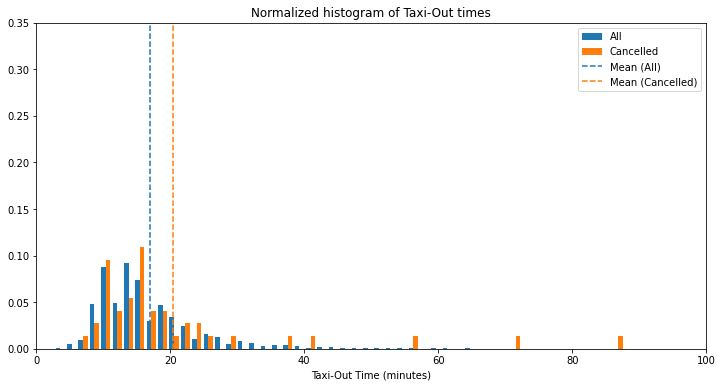

Mean Taxi-Out Time (All Flights): 16.98 minutes
Mean Taxi-Out Time (Cancelled Flights): 20.44 minutes


In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

x = df['TaxiOut'][df['TaxiOut'] > 0]
y = cancelled['TaxiOut'][cancelled['TaxiOut'] > 0]

x_mean = x.mean()
y_mean = y.mean()

ax.hist([x, y], density=True, bins=100, label=['All', 'Cancelled'])

ax.axvline(x_mean, color='#1f77b4', linestyle='--', label='Mean (All)')
ax.axvline(y_mean, color='#ff7f0e', linestyle='--', label='Mean (Cancelled)')

ax.set_xlim(0, 100)
ax.set_xlabel('Taxi-Out Time (minutes)')

plt.ylim(0.00, 0.35)

ax.set_title('Normalized histogram of Taxi-Out times')

plt.legend()

plt.show()

all_flights_mean_taxiout = df['TaxiOut'][df['TaxiOut'] > 0].mean()

cancelled_flights_mean_taxiout = cancelled['TaxiOut'][cancelled['TaxiOut'] > 0].mean()
print(f"Mean Taxi-Out Time (All Flights): {all_flights_mean_taxiout:.2f} minutes")
print(f"Mean Taxi-Out Time (Cancelled Flights): {cancelled_flights_mean_taxiout:.2f} minutes")

In [18]:
# Calculate the count of flights for each origin
origin_flights = df['Origin'].groupby(df['Origin']).count()

# Calculate the count of cancelled flights for each origin
origin_cancelled = df['Cancelled'].groupby(df['Origin']).sum()

# Calculate the percentage of cancelled flights for each origin
origin_pct_cancelled = 100 * origin_cancelled / origin_flights

# Calculate the sum of diverted flights for each origin
origin_diverted = df['Diverted'].groupby(df['Origin']).sum()

# Calculate the mean air time for each origin
origin_avg_time = df['AirTime'].groupby(df['Origin']).mean()

# Calculate the mean distance for each origin
origin_avg_dist = df['Distance'].groupby(df['Origin']).mean()

# Calculate the mean total delay for each origin (assuming 'total_delay' is a calculated column)
origin_avg_delay = df['DepDelayMinutes'].groupby(df['Origin']).mean()

# Calculate the mean taxi-out time for each origin
origin_avg_taxiOut = df['TaxiOut'].groupby(df['Origin']).mean()

# Create a summary table for origins
summary_table_origin = pd.concat([origin_flights, origin_cancelled, origin_pct_cancelled, origin_diverted,
                                  origin_avg_time, origin_avg_dist, origin_avg_delay,
                                  origin_avg_taxiOut], axis=1)

# Rename the columns in the summary table
summary_table_origin.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                                 'Diverted Flights', 'Average Flight Time (minutes)',
                                 'Average Flight Distance (miles)', 'Average Flight Delay (minutes)',
                                 'Average Taxi-Out (minutes)']

# Sort the summary table by total flights in descending order
summary_table_origin = summary_table_origin.sort_values('Total Flights', ascending=False)

# Display the top 15 rows of the summary table
summary_table_origin.head(15)

,Total Flights,Cancelled Flights,Percent Cancelled,Diverted Flights,Average Flight Time (minutes),Average Flight Distance (miles),Average Flight Delay (minutes),Average Taxi-Out (minutes)
Origin,,,,,,,,
ATL,13645,303,2.220594,40,95.477898,667.573177,13.795684,15.058190
ORD,12599,391,3.103421,35,104.357266,740.190968,14.920527,20.661402
DFW,11861,420,3.541017,30,108.169223,794.008768,16.753209,17.252930
DEN,11772,341,2.896704,29,111.896246,853.172018,19.102921,17.021237
CLT,9349,310,3.315863,25,83.405813,554.703284,14.304021,20.555781
LAX,8254,131,1.587109,19,161.819965,1307.222922,13.502769,15.972862
LGA,7484,501,6.694281,22,109.439592,712.201229,18.544481,23.160208
SEA,7393,167,2.258894,14,140.708680,1104.620181,10.484656,17.729474
LAS,7165,121,1.688765,4,123.367330,972.132589,16.849645,15.773622


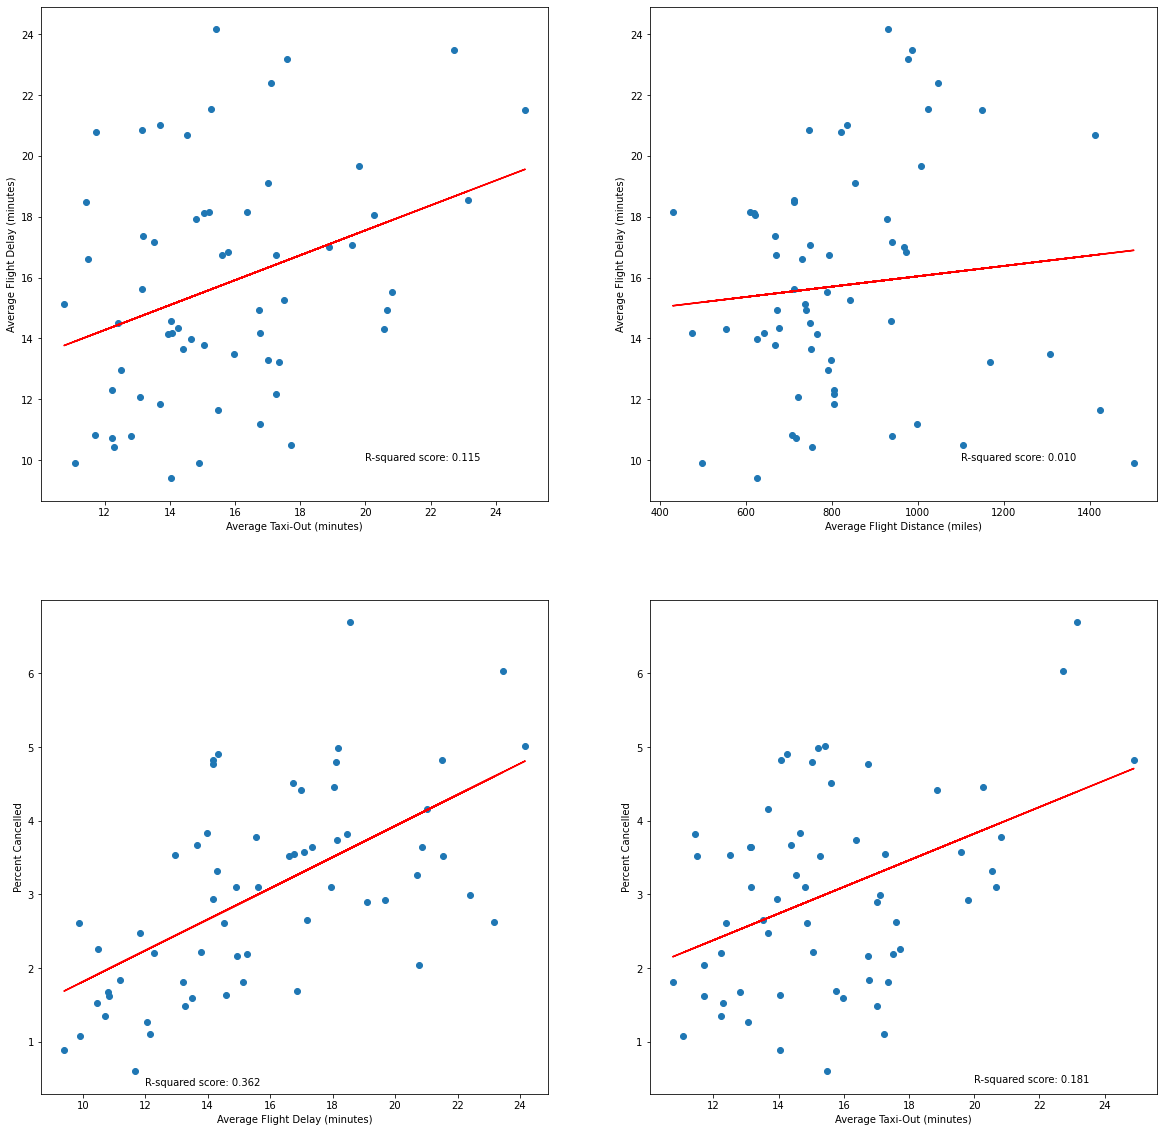

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer 

df1 = summary_table_origin[summary_table_origin['Total Flights'] > 1000]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

X = df1['Average Taxi-Out (minutes)']
y = df1['Average Flight Delay (minutes)']
ax1.scatter(X, y)

X = X.values.reshape(-1, 1)
y = y.values.reshape(1, -1)
y_imputer = SimpleImputer(strategy='mean')

y_imputed = y_imputer.fit_transform(y)
y_imputed = y_imputed[0]

linreg = LinearRegression().fit(X, y_imputed)
ax1.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax1.text(20, 10, 'R-squared score: {:.3f}'.format(linreg.score(X, y_imputed)))
ax1.set_xlabel('Average Taxi-Out (minutes)')
ax1.set_ylabel('Average Flight Delay (minutes)')


X = df1['Average Flight Distance (miles)']
y = df1['Average Flight Delay (minutes)']
ax2.scatter(X, y)

X = X.values.reshape(-1, 1)
y = y.values.reshape(1, -1)

linreg = LinearRegression().fit(X, y_imputed)
ax2.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax2.text(1100, 10, 'R-squared score: {:.3f}'.format(linreg.score(X, y_imputed)))
ax2.set_xlabel('Average Flight Distance (miles)')
ax2.set_ylabel('Average Flight Delay (minutes)')

X = df1['Average Flight Delay (minutes)']
y = df1['Percent Cancelled']
ax3.scatter(X, y)

X = X.values.reshape(-1, 1)

linreg = LinearRegression().fit(X, y)
ax3.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax3.text(12, 0.4, 'R-squared score: {:.3f}'.format(linreg.score(X, y)))
ax3.set_xlabel('Average Flight Delay (minutes)')
ax3.set_ylabel('Percent Cancelled')


X = df1['Average Taxi-Out (minutes)']
y = df1['Percent Cancelled']
ax4.scatter(X, y)

X = X.values.reshape(-1, 1)

linreg = LinearRegression().fit(X, y)
ax4.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-')
ax4.text(20, 0.45, 'R-squared score: {:.3f}'.format(linreg.score(X, y)))
ax4.set_xlabel('Average Taxi-Out (minutes)')
ax4.set_ylabel('Percent Cancelled')

plt.show()